# Training a machine learning model with scikit-learn

## Agenda

- What is the **K-nearest neighbors** classification model?
- What are the four steps for **model training and prediction** in scikit-learn?
- How can I apply this pattern to **other machine learning models**?

## Reviewing the iris dataset

In [ ]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

- 150 **observations**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **Response** variable is the iris species
- **Classification** problem since response is categorical
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Example training data

![Training data](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

*Image Credits: [Data3classes](http://commons.wikimedia.org/wiki/File:Data3classes.png#/media/File:Data3classes.png), [Map1NN](http://commons.wikimedia.org/wiki/File:Map1NN.png#/media/File:Map1NN.png), [Map5NN](http://commons.wikimedia.org/wiki/File:Map5NN.png#/media/File:Map5NN.png) by Agor153. Licensed under CC BY-SA 3.0*

## Loading the data

In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
import numpy as np

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data[:, [2, 3]]

# store response vector in "y"
y = iris.target

In [2]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150L, 2L)
(150L,)


## Preprocessing the data

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [4]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [6]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [7]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [8]:
knn.predict([[4, 2]])

array([2])

- Returns a NumPy array
- Can predict for multiple observations at once

In [9]:
X_new = [[4, 2], [3, 2]]
knn.predict(X_new)

array([2, 2])

In [1]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)


## Visualizing prediction boundary

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
#import numpy as np


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

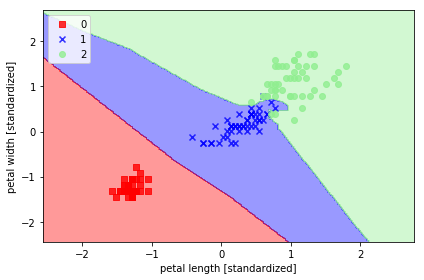

In [11]:
plot_decision_regions(X=X, y=y,
                      classifier=knn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

## Using a different value for K

In [12]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([2, 2])

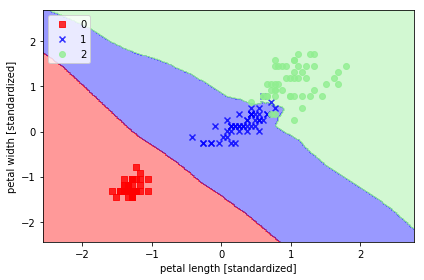

In [13]:
plot_decision_regions(X=X, y=y,
                      classifier=knn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

## Using a different classification model

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)